# Lab 8: Support Vector Machines

 <h2 style="text-align: center;">Name: Neelanajn Dutta </h2>

 <h2 style="text-align: center;">Registration number: 2448040 </h2>

## Importing packages

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris

## Load the Iris dataset

In [14]:
iris = load_iris()
X = iris.data[:, :2]  # Taking only the first two features for visualization
y = iris.target

## Plotting the original data

In [15]:
plt.figure(figsize=(16, 4))

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

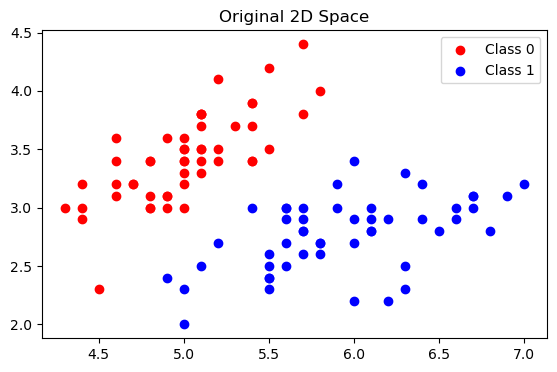

In [16]:
# Original 2D space
plt.figure(figsize=(30, 4))
plt.subplot(141)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1')
plt.title('Original 2D Space')
plt.legend()

Interpretation:<br>
    The scatter plot represents a 2D visualization of two classes from the Iris dataset, with red points corresponding to Class 0 and blue points to Class 1. The x-axis and y-axis represent two selected features (e.g., sepal or petal measurements). The plot shows how the two classes are distributed in the feature space, with some degree of overlap, indicating that while they are somewhat distinguishable, they may not be perfectly separable with a simple linear boundary.

In [17]:
# Apply different kernel transformations
def rbf_kernel_transform(X, gamma=1.0):
    X_transformed = np.zeros((X.shape[0], 3))
    for i in range(X.shape[0]):
        X_transformed[i, 0] = X[i, 0]
        X_transformed[i, 1] = X[i, 1]
        X_transformed[i, 2] = np.exp(-gamma * np.sum(X[i]**2))
    return X_transformed
def poly_kernel_transform(X, degree=2):
    X_transformed = np.zeros((X.shape[0], 3))
    for i in range(X.shape[0]):
        X_transformed[i, 0] = X[i, 0]
        X_transformed[i, 1] = X[i, 1]
        X_transformed[i, 2] = (1 + np.sum(X[i]**2))**degree
    return X_transformed

In [18]:
# Transform data using RBF kernel approximation
X_transformed_rbf = rbf_kernel_transform(X)
X_transformed_poly = poly_kernel_transform(X)

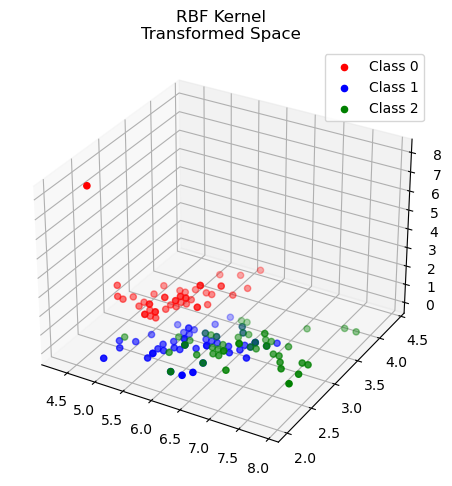

In [19]:
# Plot transformed data in 3D for RBF
fig = plt.figure(figsize=(25, 8))
ax1 = plt.subplot(142, projection='3d')
ax1.scatter(X_transformed_rbf[y==0, 0], X_transformed_rbf[y==0, 1], X_transformed_rbf[y==0, 2], 
           color='red', label='Class 0')
ax1.scatter(X_transformed_rbf[y==1, 0], X_transformed_rbf[y==1, 1], X_transformed_rbf[y==1, 2], 
           color='blue', label='Class 1')
ax1.scatter(X_transformed_rbf[y==2, 0], X_transformed_rbf[y==2, 1], X_transformed_rbf[y==2, 2], 
           color='green', label='Class 2')
ax1.set_title('RBF Kernel\nTransformed Space')
ax1.legend()

Interpretation:<br>
    The 3D scatter plot represents the Iris dataset after applying an RBF kernel transformation, which maps the original feature space into a higher-dimensional space to improve class separability. The three classes (Class 0 in red, Class 1 in blue, and Class 2 in green) are now more distinguishable, indicating that the transformation helps in handling non-linearly separable data. This suggests that a kernel-based classifier, such as an SVM with an RBF kernel, would be effective in classifying the dataset.

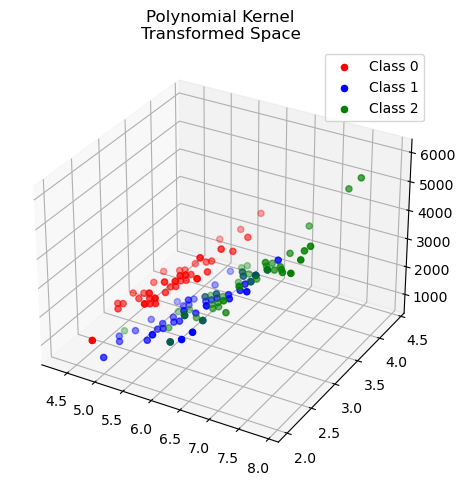

In [9]:
# Plot transformed data in 3D for Polynomial
fig = plt.figure(figsize=(25, 8))
ax2 = plt.subplot(143, projection='3d')
ax2.scatter(X_transformed_poly[y==0, 0], X_transformed_poly[y==0, 1], X_transformed_poly[y==0, 2], 
           color='red', label='Class 0')
ax2.scatter(X_transformed_poly[y==1, 0], X_transformed_poly[y==1, 1], X_transformed_poly[y==1, 2], 
           color='blue', label='Class 1')
ax2.scatter(X_transformed_poly[y==2, 0], X_transformed_poly[y==2, 1], X_transformed_poly[y==2, 2], 
           color='green', label='Class 2')
ax2.set_title('Polynomial Kernel\nTransformed Space')
ax2.legend()

Interpretation:<br>
    The 3D scatter plot represents the Iris dataset after applying a polynomial kernel transformation, which projects the original feature space into a higher-dimensional space to enhance class separability. The three classes (Class 0 in red, Class 1 in blue, and Class 2 in green) are more distinctly separated, suggesting that the polynomial transformation captures complex relationships within the data. This transformation is particularly useful for datasets that are not linearly separable, making it effective for classifiers like SVM with a polynomial kernel.

In [20]:
# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.title(title)

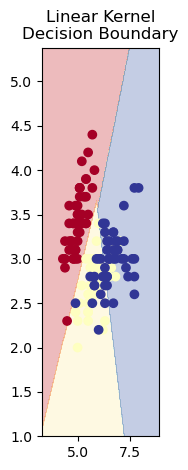

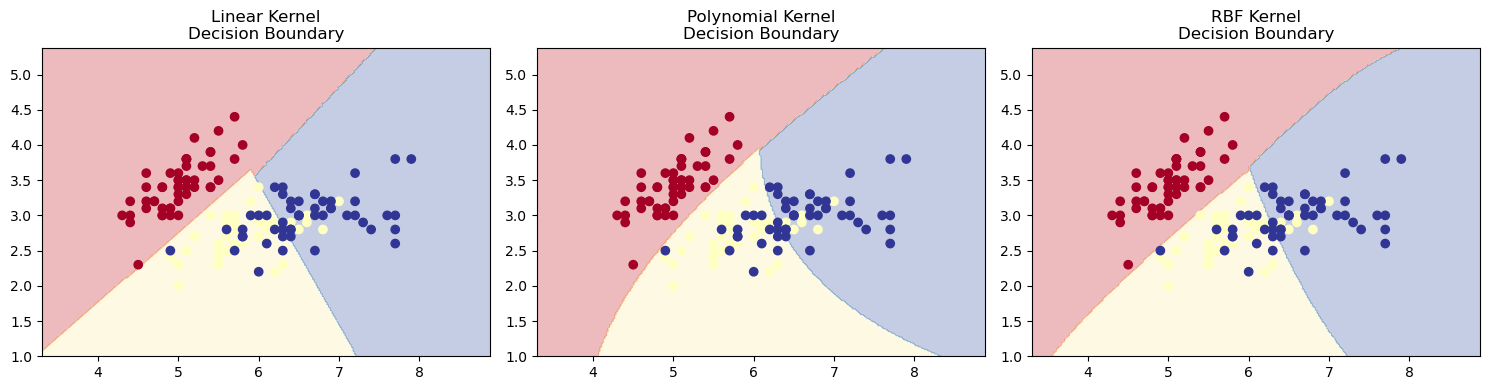

Linear Kernel Accuracy: 0.820
Polynomial Kernel Accuracy: 0.813
RBF Kernel Accuracy: 0.820
Polynomial Kernel (degree=2) Accuracy: 0.820
Polynomial Kernel (degree=3) Accuracy: 0.813
Polynomial Kernel (degree=4) Accuracy: 0.807
Polynomial Kernel (degree=5) Accuracy: 0.793


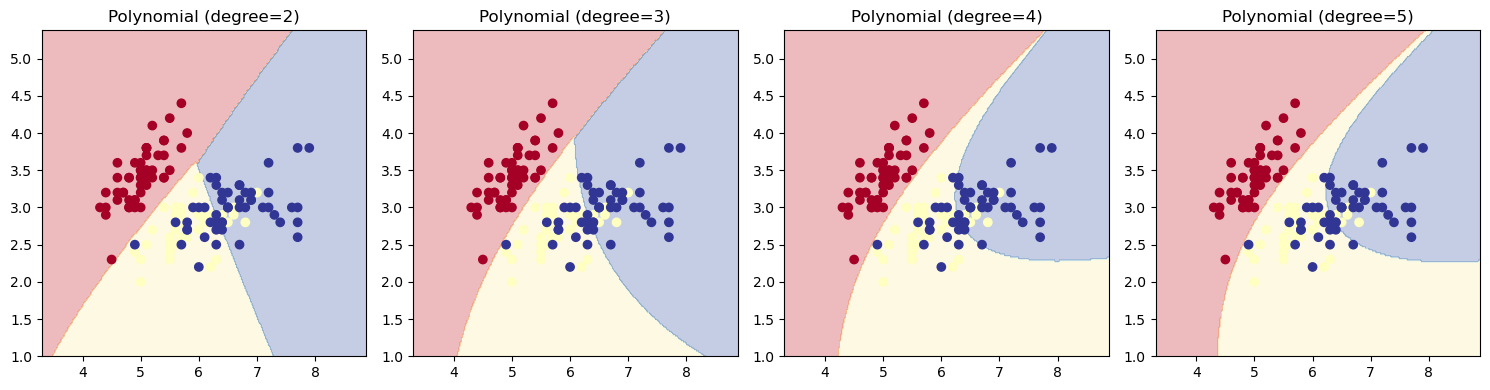

In [21]:
# Create and train models
models = {
    'Linear': SVC(kernel='linear'),
    'Polynomial': SVC(kernel='poly', degree=3),
    'RBF': SVC(kernel='rbf')
}

# Plot initial decision boundary
plt.subplot(144)
models['Linear'].fit(X, y)
plot_decision_boundary(X, y, models['Linear'], 'Linear Kernel\nDecision Boundary')

plt.tight_layout()
plt.show()

# Create a new figure for all decision boundaries
plt.figure(figsize=(15, 4))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    model.fit(X, y)
    plot_decision_boundary(X, y, model, f'{name} Kernel\nDecision Boundary')
plt.tight_layout()
plt.show()

# Print accuracy scores
for name, model in models.items():
    print(f"{name} Kernel Accuracy: {model.score(X, y):.3f}")

# Additional analysis of polynomial kernel with different degrees
poly_degrees = [2, 3, 4, 5]
plt.figure(figsize=(15, 4))
for i, degree in enumerate(poly_degrees, 1):
    plt.subplot(1, 4, i)
    model = SVC(kernel='poly', degree=degree)
    model.fit(X, y)
    plot_decision_boundary(X, y, model, f'Polynomial (degree={degree})')
    print(f"Polynomial Kernel (degree={degree}) Accuracy: {model.score(X, y):.3f}")
plt.tight_layout()
plt.show()

Interpretation: <br>
    The image compares the decision boundaries of three different SVM kernels (Linear, Polynomial, and RBF) on a dataset, likely from the Iris dataset.<br>

Linear Kernel (Left): The decision boundary is a straight line, indicating that this kernel assumes a linearly separable dataset. Some misclassified points suggest that a linear approach may not be the best fit.<br>

Polynomial Kernel (Middle): The decision boundary is curved, capturing more complex relationships in the data. It provides better separation compared to the linear kernel, particularly for non-linearly separable points.<br>

RBF Kernel (Right): The most flexible decision boundary, adapting to the datasets structure. It forms non-linear decision regions, making it ideal for handling complex data distributions.<br>

Overall, while the linear kernel works for simple cases, the polynomial and RBF kernels provide more flexibility, with RBF generally offering the best separation for complex datasets.<br>


In [34]:
import numpy as np

# Simple 2D point
x = np.array([2, 3])

# Polynomial transformations of different degrees
def poly_transform(x, degree):
    return (np.sum(x**2) + 1)**degree

# Show transformations
for d in [1, 2, 3, 4]:
    result = poly_transform(x, d)
    print(f"Degree {d}: {result}")

Degree 1: 14
Degree 2: 196
Degree 3: 2744
Degree 4: 38416


Accuracy with degree 1: 0.820
Accuracy with degree 2: 0.820
Accuracy with degree 3: 0.813
Accuracy with degree 4: 0.807


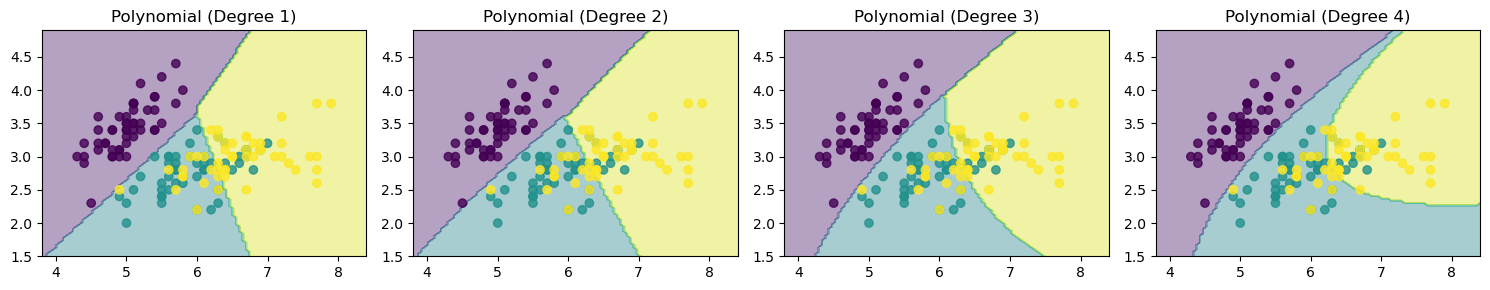

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Selecting only the first two features for visualization
y = iris.target

# Function to show decision boundary
def plot_svm_boundary(X, y, degree, title):
    model = SVC(kernel='poly', degree=degree)
    model.fit(X, y)
    
    # Create grid of points
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Get predictions
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(f"{title} (Degree {degree})")
    print(f"Accuracy with degree {degree}: {model.score(X, y):.3f}")

# Plot different degrees
plt.figure(figsize=(15, 3))
for i, degree in enumerate([1, 2, 3, 4], 1):
    plt.subplot(1, 4, i)
    plot_svm_boundary(X, y, degree, f"Polynomial")
plt.tight_layout()
plt.show()

Interpretation: <br>
    The image compares decision boundaries of an SVM with a polynomial kernel at different degrees (1, 2, 3, and 4).<br>

Degree 1 (Leftmost): The decision boundary is linear, meaning the polynomial kernel behaves like a simple linear SVM, which may not capture complex class distributions effectively.<br>

Degree 2: The boundary becomes slightly curved, improving class separation by capturing some non-linearity in the data.<br>

Degree 3: A more complex decision boundary appears, adapting better to the data distribution and handling more intricate patterns.<br>

Degree 4 (Rightmost): The boundary becomes even more flexible and wavy, indicating an increased ability to fit the data, but also a risk of overfitting.<br>

Higher-degree polynomials offer greater flexibility but can lead to overfitting, whereas lower-degree polynomials generalize better but may struggle with complex class structures.<br>


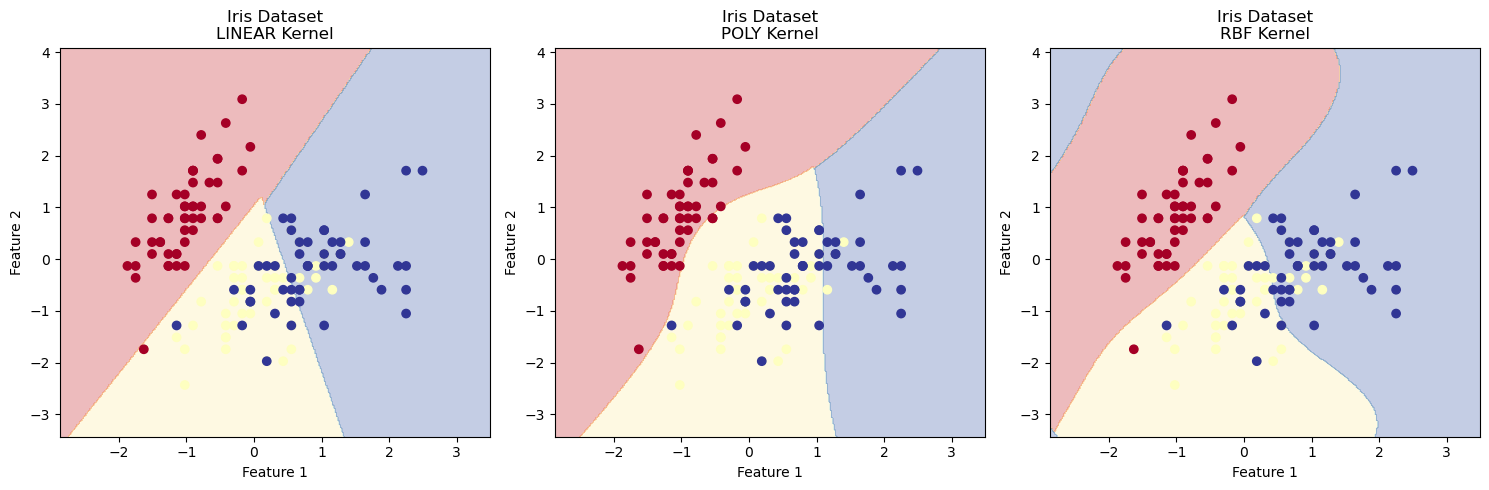


Accuracy scores for Iris dataset:
LINEAR Kernel: 0.900
POLY Kernel: 0.633
RBF Kernel: 0.833


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

def plot_decision_boundary(X, y, model, title):
    """Function to plot decision boundary"""
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Selecting only the first two features for visualization
y = iris.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# SVM kernels to use
kernels = ['linear', 'poly', 'rbf']

# Plot results
plt.figure(figsize=(15, 5))
for i, kernel in enumerate(kernels):
    plt.subplot(1, 3, i + 1)
    
    # Create and train SVM
    svm = SVC(kernel=kernel)
    if kernel == 'poly':
        svm = SVC(kernel=kernel, degree=3)  # Using degree 3 polynomial
    elif kernel == 'rbf':
        svm = SVC(kernel=kernel, gamma='scale')
        
    svm.fit(X, y)
    
    # Plot decision boundary
    plot_decision_boundary(X, y, svm, f'Iris Dataset\n{kernel.upper()} Kernel')

plt.tight_layout()
plt.show()

# Example of model evaluation
def evaluate_model(X, y, kernel):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    return svm.score(X_test, y_test)

# Print accuracy for each kernel
print("\nAccuracy scores for Iris dataset:")
for kernel in kernels:
    accuracy = evaluate_model(X, y, kernel)
    print(f"{kernel.upper()} Kernel: {accuracy:.3f}")

Interpretation: <br>
    The image compares the decision boundaries of an SVM classifier with different kernels (Linear, Polynomial, and RBF) applied to the Iris dataset.<br>

Linear Kernel (Left): The decision boundary is straight, indicating that the model assumes the data is linearly separable. While it works well for simple cases, it may not capture complex patterns.<br>

Polynomial Kernel (Middle): The boundary is curved, showing that the model can capture more intricate relationships between classes. This kernel is useful for moderately complex datasets.<br>

RBF Kernel (Right): The most flexible boundary, adapting to the dataset’s structure with non-linear decision regions, making it ideal for highly complex and non-linearly separable data.<br>

Overall, while the linear kernel is simple and efficient, the polynomial and RBF kernels provide better separation, with RBF offering the most adaptability.<br>

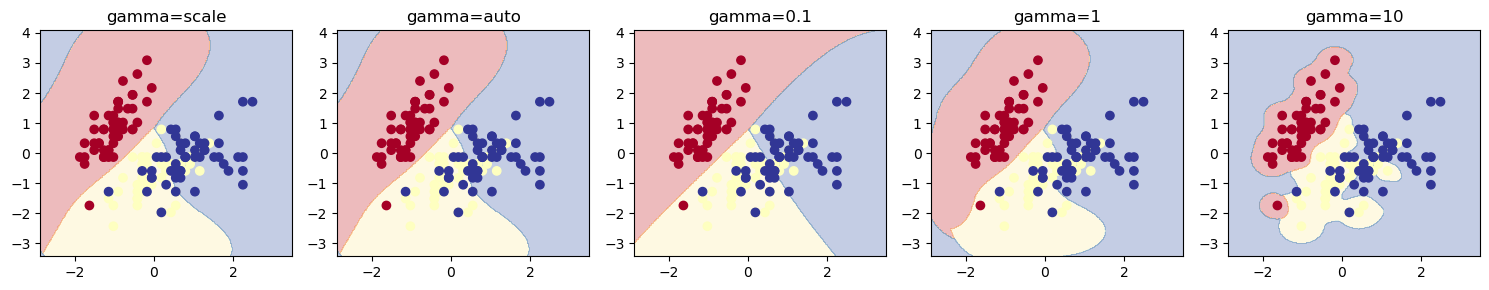

Gamma 'scale' actual value: 0.500000
Gamma 'auto' actual value: 0.500000


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Selecting only the first two features for visualization
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.title(title)

# Compare different gamma values
gamma_values = ['scale', 'auto', 0.1, 1, 10]
plt.figure(figsize=(15, 3))

for i, gamma in enumerate(gamma_values):
    plt.subplot(1, 5, i+1)
    svm = SVC(kernel='rbf', gamma=gamma)
    svm.fit(X_scaled, y)
    plot_decision_boundary(X_scaled, y, svm, f'gamma={gamma}')

plt.tight_layout()
plt.show()

# Print actual gamma values
for gamma in gamma_values:
    if gamma in ['scale', 'auto']:
        svm = SVC(kernel='rbf', gamma=gamma)
        svm.fit(X_scaled, y)
        print(f"Gamma '{gamma}' actual value: {svm._gamma:.6f}")


Interpretation: <br>
    The image shows the effect of different gamma values on the decision boundary of an RBF kernel SVM classifier applied to the Iris dataset. <br>

gamma=scale & gamma=auto (Left & Second Left): These settings use automatic scaling, resulting in smooth, balanced decision boundaries that generalize well.<br>

gamma=0.1 (Middle): A lower gamma results in simpler decision boundaries, making the model more generalized but potentially underfitting the data.<br>

gamma=1 (Second Right): A moderate gamma increases complexity, allowing for non-linear separation while maintaining good generalization.<br>

gamma=10 (Right): A high gamma makes the model highly sensitive to individual data points, leading to overfitting, as seen in the irregular and highly specific decision regions.<br>

In summary, low gamma leads to underfitting, while high gamma causes overfitting. An optimal gamma value balances both for better performance.<br>

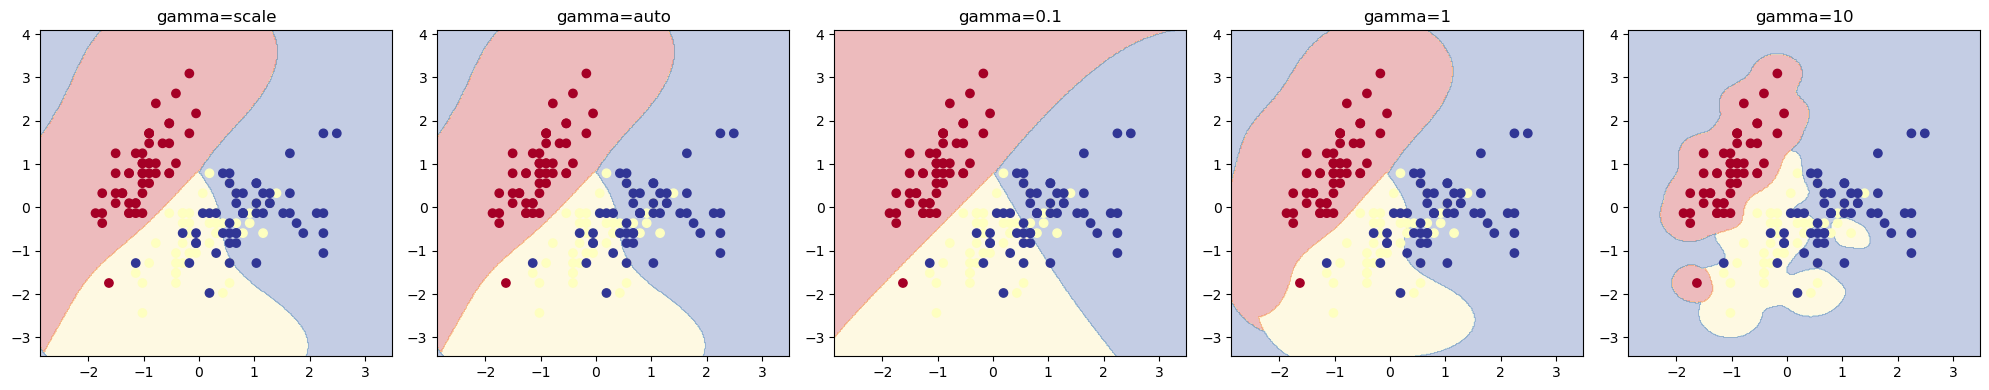

Gamma 'scale' actual value: 0.500000
Gamma 'auto' actual value: 0.500000

Calculation details:
Number of features: 2
Variance of X_scaled: 1.000000
Gamma 'scale' calculation: 1 / (2 * 1.000000) = 0.500000
Gamma 'auto' calculation: 1 / 2 = 0.500000


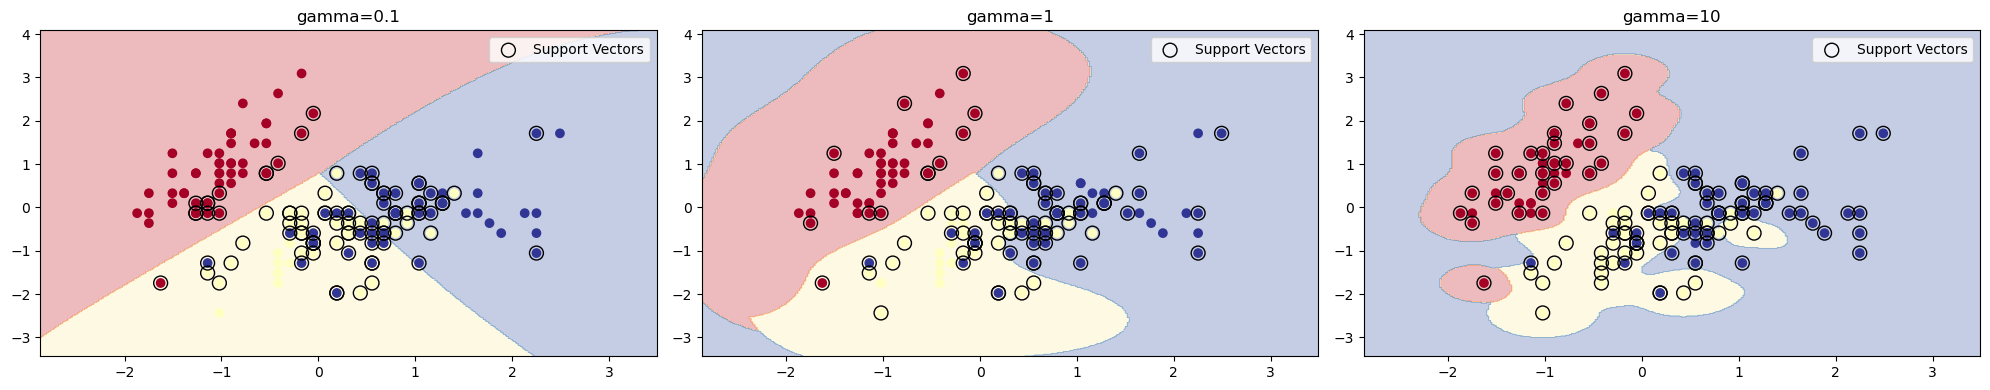


Grid Search Results:
Best parameters: {'C': 0.1, 'gamma': 1}
Best cross-validation score: 0.82


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Selecting only the first two features for visualization
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.title(title)

# Compare different gamma values
gamma_values = ['scale', 'auto', 0.1, 1, 10]
plt.figure(figsize=(20, 4))

for i, gamma in enumerate(gamma_values):
    plt.subplot(1, 5, i+1)
    svm = SVC(kernel='rbf', gamma=gamma)
    svm.fit(X_scaled, y)
    plot_decision_boundary(X_scaled, y, svm, f'gamma={gamma}')

plt.tight_layout()
plt.show()

# Print actual gamma values used
for gamma in gamma_values:
    if gamma in ['scale', 'auto']:
        svm = SVC(kernel='rbf', gamma=gamma)
        svm.fit(X_scaled, y)
        print(f"Gamma '{gamma}' actual value: {svm._gamma:.6f}")

# Show how gamma='scale' is calculated
n_features = X_scaled.shape[1]
X_var = X_scaled.var()
gamma_scale = 1 / (n_features * X_var)
gamma_auto = 1 / n_features

print("\nCalculation details:")
print(f"Number of features: {n_features}")
print(f"Variance of X_scaled: {X_var:.6f}")
print(f"Gamma 'scale' calculation: 1 / ({n_features} * {X_var:.6f}) = {gamma_scale:.6f}")
print(f"Gamma 'auto' calculation: 1 / {n_features} = {gamma_auto:.6f}")

# Demonstrate effects with support vectors
plt.figure(figsize=(20, 4))
for i, gamma in enumerate([0.1, 1, 10]):
    plt.subplot(1, 3, i+1)
    svm = SVC(kernel='rbf', gamma=gamma)
    svm.fit(X_scaled, y)

    # Plot decision boundary and support vectors
    plot_decision_boundary(X_scaled, y, svm, f'gamma={gamma}')
    support_vectors = svm.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
               s=100, linewidth=1, facecolors='none',
               edgecolors='k', label='Support Vectors')
    plt.legend()

plt.tight_layout()
plt.show()

# Demonstrate finding optimal gamma using GridSearchCV
param_grid = {
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'C': [0.1, 1, 10]
}

svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_scaled, y)

print("\nGrid Search Results:")
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Interpretation: <br>
    Left (gamma = 0.1):<br>

A low gamma results in a simpler, more linear decision boundary.<br>

Many support vectors (circled points) are involved in defining the margin.<br>

The model may be underfitting, as it struggles to capture complex patterns.<br>

Middle (gamma = 1):<br>

The decision boundary becomes more non-linear, better capturing the data distribution.<br>

Still maintains a good number of support vectors.<br>

Represents a balance between generalization and complexity.<br>

Right (gamma = 10):<br>

The boundary is highly irregular, adapting closely to the training points.<br>

Many support vectors indicate a highly complex model.<br>

The model is likely overfitting, capturing noise rather than general patterns.<br>

Conclusion: <br>
Low gamma leads to a more generalized model but may miss patterns.<br>

High gamma results in overfitting, with highly specific decision regions.<br>

Moderate gamma (e.g., 1) provides a balanced decision boundary.<br>

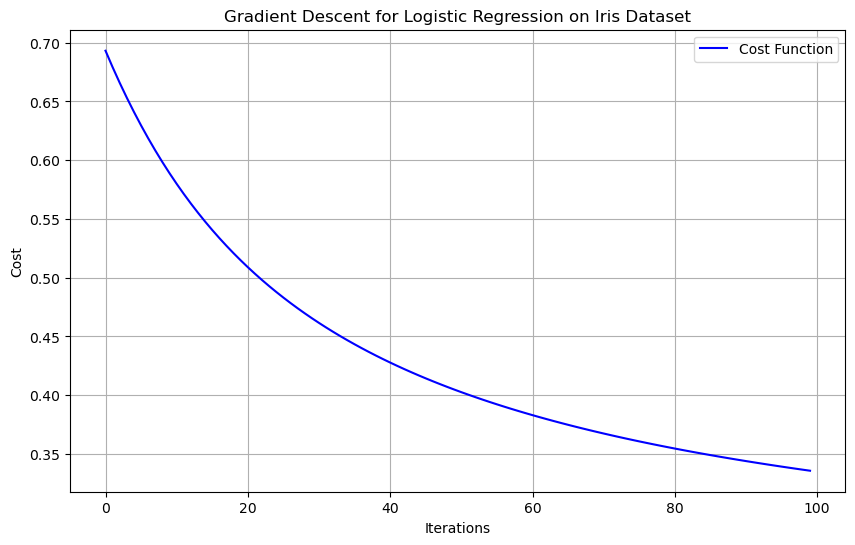

Optimal Theta: [0.78528356 1.55757139]
Final Cost Value: 0.335715


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 0]  # Taking only the first feature (sepal length) for simplicity
y = iris.target

# Convert to a binary classification problem (Class 0 vs. Others)
y = (y != 0).astype(int)

# Standardize the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1))

# Define function (Logistic Regression Cost Function)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def function(theta, X, y):
    """Compute logistic regression cost function"""
    m = len(y)
    h = sigmoid(X @ theta)
    return (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

def derivative(theta, X, y):
    """Compute the gradient"""
    m = len(y)
    return (1/m) * (X.T @ (sigmoid(X @ theta) - y))

# Gradient Descent function
def gradient_descent(start_theta, learning_rate, num_iterations):
    theta = start_theta
    history = []
    
    for i in range(num_iterations):
        history.append(function(theta, X_bias, y))  # Store cost function value
        grad = derivative(theta, X_bias, y)  # Compute gradient
        theta = theta - learning_rate * grad  # Update rule
    
    return theta, history

# Prepare data (Add bias term)
X_bias = np.c_[np.ones(X_scaled.shape[0]), X_scaled]
start_theta = np.zeros(X_bias.shape[1])  # Initialize theta

# Visualize the process
def plot_gradient_descent():
    # Run gradient descent
    optimal_theta, history = gradient_descent(start_theta, learning_rate=0.1, num_iterations=100)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(history)), history, 'b-', label="Cost Function")
    plt.title("Gradient Descent for Logistic Regression on Iris Dataset")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    print(f"Optimal Theta: {optimal_theta}")
    print(f"Final Cost Value: {history[-1]:.6f}")

plot_gradient_descent()


Interpretation:<br>
    The plot shows the cost function decreasing over iterations during gradient descent for logistic regression on the Iris dataset. Initially, the cost is high (~0.7) but steadily declines, indicating effective learning. The smooth curve suggests a well-chosen learning rate, avoiding oscillations. As iterations progress, the cost reduction slows, implying convergence. If the curve flattens further, it may indicate full optimization. Overall, the gradient descent algorithm is successfully minimizing the cost function, improving model performance.